In [1]:
###########################################
############### CODE-SAMPLE ###############
# Author: Charles Zange                   #
# Date modified: 2019-06-09 05:43PM EST   #
# Client: INFO634-900, Drexel University  #
###########################################


#########################################################################################################
################################################ SUMMARY ################################################
# This code is a sample of the total code used for this project.                                        #
# Code included:                                                                                        #
## Syntax necessary to run the machine learning algorithm to create the final classification model.     #
## Syntax that checks the accuracy of the said model.                                                   #
# Code not included:                                                                                    #
## All preprocessing to create the dataset for the classification model.                                #
## Previous iterations of the final classification model that failed to perform to expectations.        #
#                                                                                                       #
# Code must be executed from the same working directory as the target files. Names must match.          #
# This document is hard-coded to execute on specifically the Library_Collection_Inventory.csv, and has  #
# not been generalized for additional inputs.                                                           #
#########################################################################################################


In [1]:
#### IMPORTS ####

# Basic necessities for document handling
import numpy as np
import pandas as pd
import csv
import codecs
pd.options.mode.chained_assignment = None # helps with slicing dataframes

# tools for machine learning, accuracy management, and feature selection
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif

# additional tools for plotting confusion matrix
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
%matplotlib inline

In [2]:
#### LOAD ####

# Loads source data that has been preprocessed.
df = pd.read_csv(codecs.open("Library_Collection_Inventory.csv", 'r', encoding='utf-8',errors='ignore'))

In [3]:
# Check keys
df.keys()

Index(['BibNum', 'Title', 'Author', 'ISBN', 'PublicationYear', 'Publisher',
       'Subjects', 'ItemType', 'ItemCollection', 'FloatingItem',
       'ItemLocation', 'ReportDate', 'ItemCount'],
      dtype='object')

In [4]:
# Check data
df.head()

,BibNum,Title,Author,ISBN,PublicationYear,Publisher,Subjects,ItemType,ItemCollection,FloatingItem,ItemLocation,ReportDate,ItemCount
0,3011076,A tale of two friends / adapted by Ellie O'Rya...,"O'Ryan, Ellie","1481425730, 1481425749, 9781481425735, 9781481...",2014.,"Simon Spotlight,","Musicians Fiction, Bullfighters Fiction, Best ...",jcbk,ncrdr,Floating,qna,09/01/2017,1
1,2248846,"Naruto. Vol. 1, Uzumaki Naruto / story and art...","Kishimoto, Masashi, 1974-",1569319006,"2003, c1999.","Viz,","Ninja Japan Comic books strips etc, Comic book...",acbk,nycomic,NaN,lcy,09/01/2017,1
2,3209270,"Peace, love & Wi-Fi : a ZITS treasury / by Jer...","Scott, Jerry, 1955-","144945867X, 9781449458676",2014.,"Andrews McMeel Publishing,",Duncan Jeremy Fictitious character Comic books...,acbk,nycomic,NaN,bea,09/01/2017,1
3,1907265,The Paris pilgrims : a novel / Clancy Carlile.,"Carlile, Clancy, 1930-",0786706155,c1999.,"Carroll & Graf,","Hemingway Ernest 1899 1961 Fiction, Biographic...",acbk,cafic,NaN,cen,09/01/2017,1
4,1644616,"Erotic by nature : a celebration of life, of l...",NaN,094020813X,"1991, c1988.","Red Alder Books/Down There Press,","Erotic literature American, American literatur...",acbk,canf,NaN,cen,09/01/2017,1


In [7]:
# Filter out FloatingItems, since these have multiple locations
mask_floating = [value != 'Floating' for value in df['FloatingItem']]
df = df[mask_floating]

# Drop fields that are excluded from testing
df = df.drop(columns=['ReportDate','ISBN','Title','BibNum','FloatingItem','ItemCount'])

# Clear out NA's to clean up data.
df = df.dropna()

# Show new results
#df.head()

In [8]:
#### CLASSIFIER PREP ####
# Generates a dict for re-encoding the string values for
# itemType, itemCollection, and itemLocation into integers.
# This is necessary for RandomForest using Python 3 in my development
# environment of Jupyter Lab.


authors, publicationyears, publishers, itemTypes, itemCollections, subjects = {},{},{},{},{},{}
i = 0
for idx, row in df.iterrows():
    if row['ItemType'] not in itemTypes.keys():
        itemTypes[row['ItemType']] = i
        i += 1
    if row['ItemCollection'] not in itemCollections.keys():
        itemCollections[row['ItemCollection']] = i
        i += 1
    if row['Subjects'] not in subjects.keys():
        subjects[row['Subjects']] = i
        i += 1
    if row['Author'] not in authors.keys():
        authors[row['Author']] = i
        i += 1
    if row['PublicationYear'] not in publicationyears.keys():
        publicationyears[row['PublicationYear']] = i
        i += 1
    if row['Publisher'] not in publishers.keys():
        publishers[row['Publisher']] = i
        i += 1
        

## Encodes itemType, itemCollection, and itemLocation based on dicts
df['ItemType'] = [itemTypes[item] for item in df['ItemType']]
df['ItemCollection'] = [itemCollections[item] for item in df['ItemCollection']]
df['Subjects'] = [subjects[item] for item in df['Subjects']]
df['Author'] = [authors[item] for item in df['Author']]
df['PublicationYear'] = [publicationyears[item] for item in df['PublicationYear']]
df['Publisher'] = [publishers[item] for item in df['Publisher']]

In [9]:
# Create splits from the data which will be used for F-tests in SelectKBest
# as well as the classifier. Coded for a 2/3 training 1/3 testing split
target_cols = ['Author','PublicationYear','Publisher','Subjects','ItemType','ItemCollection']
train_x, test_x, train_y, test_y = train_test_split(df[target_cols],df['ItemLocation'],train_size=.67,test_size=.33)

In [10]:
classifier = RandomForestClassifier()
classifier.fit(train_x,train_y)
output_y = classifier.predict(test_x)
score_output = classifier.score(test_x,test_y)
print("Overall accuracy: ",score_output) # It works, but the accuracy is poor, about 48%

C:\Users\zange\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Overall accuracy:  0.5132916599389508


In [11]:
# Finding K-best
kBest = SelectKBest(f_classif,k=2).fit(test_x.values,test_y.values)
for n,s in zip(test_x.keys(),kBest.scores_):
    print("Accuracy score: " + str(s) + " for feature " + str(n))

Accuracy score: 3600.103973787134 for feature Author
Accuracy score: 302.06966039633454 for feature PublicationYear
Accuracy score: 1659.1432239090318 for feature Publisher
Accuracy score: 3518.20320782055 for feature Subjects
Accuracy score: 12.083891271687051 for feature ItemType
Accuracy score: 43.477891469539685 for feature ItemCollection


In [12]:
classifier.n_classes_

30

In [13]:
classifier.feature_importances_ # this suggests that ItemCollection is the most significant

array([0.15348434, 0.10025312, 0.12674247, 0.1549791 , 0.06954648,
       0.3949945 ])

Automatically created module for IPython interactive environment


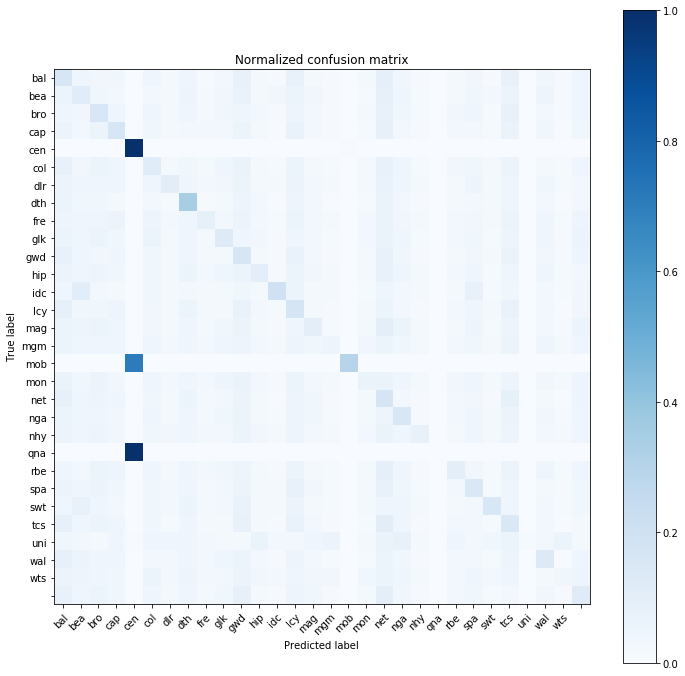

In [14]:
## Confusion matrix plotting from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
# Some slight edits to make this fit my needs

print(__doc__)

#### CZ some lines removed from original

class_names = test_y.unique() ##### CZ edited to fit my data

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = np.unique(y_pred) ##### CZ edited to fit my data
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    ####### CZ some lines removed from original

    fig, ax = plt.subplots()
    fig.set_size_inches(12,12) #### CZ added this for resizing
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    #### CZ some lines removed from original
    return ax


np.set_printoptions(precision=2)

#### CZ some lines removed from original

# Plot normalized confusion matrix
plot_confusion_matrix(test_y, output_y, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [17]:
## SECOND RUN - non-'cen' data

# Prep dataframe mask for only non-'cen' observations
mask_nonCen = [value != 'cen' for value in df['ItemLocation']]
df[mask_nonCen].head()

,Author,PublicationYear,Publisher,Subjects,ItemType,ItemCollection,ItemLocation
1,3,4,5,2,0,1,lcy
2,7,8,9,6,0,1,bea
7,17,18,19,16,0,15,lcy
8,22,23,24,21,0,20,nga
10,27,8,28,26,0,25,mon


In [18]:
# Create non-'cen' dataframe
df_nonCen = df[mask_nonCen]

In [19]:
# New train/test split
train_x2, test_x2, train_y2, test_y2 = train_test_split(df_nonCen[target_cols],df_nonCen['ItemLocation'],train_size=.67,test_size=.33)

In [20]:
# New classifier
classifier2 = RandomForestClassifier()
classifier2.fit(train_x2,train_y2)
output_y2 = classifier2.predict(test_x2)
score_output2 = classifier2.score(test_x2,test_y2)
print("Overall accuracy: ",score_output2)

C:\Users\zange\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Overall accuracy:  0.15400566825856105


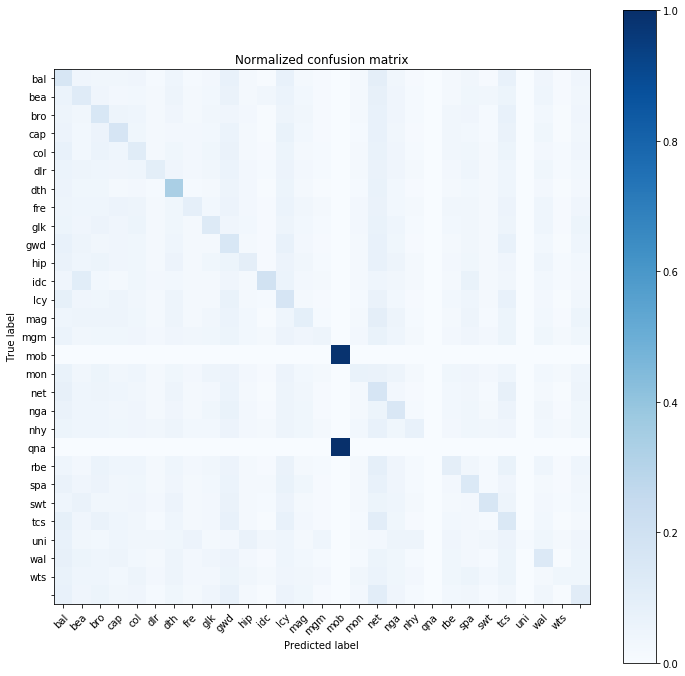

In [21]:
# New confusion matrix
class_names2 = test_y2.unique
plot_confusion_matrix(test_y2, output_y2, classes=class_names2, normalize=True,
                      title='Normalized confusion matrix')

plt.show()